**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import glob
import os
import visualkeras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout , BatchNormalization
from keras import regularizers
from keras.layers.core import Dropout
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from sklearn.naive_bayes import GaussianNB

**Resizing the image and Loading the dataset**

In [33]:
# re-size all the images
IMAGE_SIZE = [224, 224]
#loading the data
train_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\train"
test_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\test"
val_path = r"C:\Users\Computing\Downloads\data-task1\data-task1\val"

**Adding Preprocessing layers for CNN MODEL**

In [34]:
 # useful for getting number of classes
folders = glob(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\*")

In [86]:
model=Sequential([
                 Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
                 MaxPooling2D(pool_size=(2,2)),
                 Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
                 MaxPooling2D(pool_size=(2,2)),
                 Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
                 MaxPooling2D(pool_size=(2,2)),
                 Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
                 MaxPooling2D(pool_size=(2,2)),
                 Flatten()
])
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [87]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_184 (Conv2D)         (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 112, 112, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_185 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_186 (Conv2D)         (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 28, 28, 64)     

**Visualization of the model**

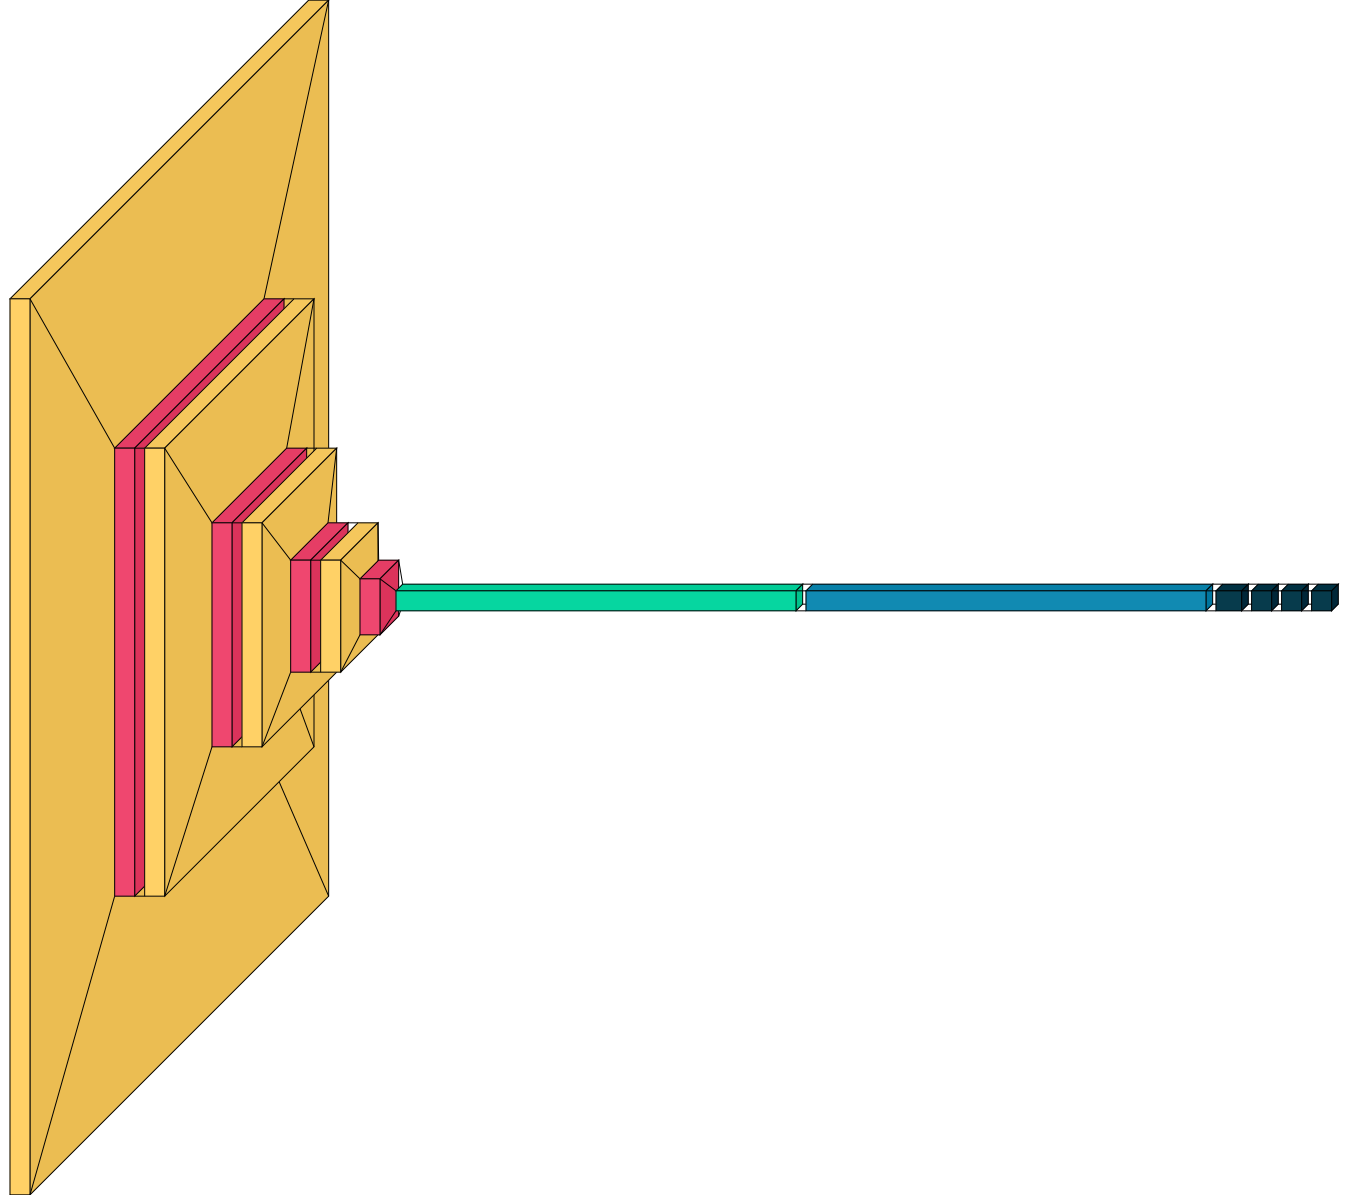

In [88]:
visualkeras.layered_view(model).show() # display using your system viewer
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

**Data Augmentation and preparing Image data generator**

In [102]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [103]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [104]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [105]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


**Callback functions**

In [106]:
#Adding the Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [107]:
#ModelCheckpoint callback saves a model at some interval. 
filepath=r"C:\Users\Computing\Downloads\data-task1\data-task1\model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [111]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, mode='min', verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for eight consecutive epochs.

In [112]:
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]

**Fit the model**

In [114]:
#Training the neural network
#We can now use these generators to train our model. 
#Give this a name so we can call it later for plotting loss, accuracy etc. as a function of epochs.
# fit the model
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks= callbacks_list)

model.save('CNN_model.hdf5')  # always save your weights after training or during training

<ipython-input-114-d9bb5e9e116a>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
94/94 [==============================] - 172s 2s/step - loss: 0.5168 - accuracy: 0.7860 - val_loss: 0.5067 - val_accuracy: 0.7900
Epoch 2/25
94/94 [==============================] - 172s 2s/step - loss: 0.5040 - accuracy: 0.7860 - val_loss: 0.4788 - val_accuracy: 0.7900
Epoch 3/25
94/94 [==============================] - 174s 2s/step - loss: 0.4738 - accuracy: 0.7860 - val_loss: 0.4615 - val_accuracy: 0.7900
Epoch 4/25
94/94 [==============================] - 170s 2s/step - loss: 0.4721 - accuracy: 0.7843 - val_loss: 0.4612 - val_accuracy: 0.7920
Epoch 5/25
94/94 [==============================] - 167s 2s/step - loss: 0.4613 - accuracy: 0.7923 - val_loss: 0.4526 - val_accuracy: 0.7920
Epoch 6/25
94/94 [==============================] - 168s 2s/step - loss: 0.4524 - accuracy: 0.7927 - val_loss: 0.4458 - val_accuracy: 0.7920
Epoch 7/25
94/94 [==============================] - 166s 2s/step - loss: 0.4561 - accuracy: 0.7950 - val_loss: 0.4705 - val_accuracy: 0.7860
Epoch 8/25
94

**Plotting the Loss and Accuracy Curve**

Values stored in history are ... 
 {'loss': [0.5167853832244873, 0.5040373206138611, 0.47382473945617676, 0.4721147119998932, 0.4613299071788788, 0.4524064064025879, 0.4560927450656891, 0.4559217095375061, 0.4423651099205017, 0.4480610489845276, 0.4487728774547577, 0.4460541605949402, 0.4403613805770874], 'accuracy': [0.7860000133514404, 0.7860000133514404, 0.7860000133514404, 0.784333348274231, 0.7923333048820496, 0.7926666736602783, 0.7950000166893005, 0.7960000038146973, 0.7993333339691162, 0.8046666383743286, 0.8016666769981384, 0.7950000166893005, 0.8063333630561829], 'val_loss': [0.506671667098999, 0.47880327701568604, 0.4614867568016052, 0.46121177077293396, 0.45258304476737976, 0.44581207633018494, 0.47048962116241455, 0.43397021293640137, 0.46109136939048767, 0.45692628622055054, 0.4413822889328003, 0.44968029856681824, 0.43666818737983704], 'val_accuracy': [0.7900000214576721, 0.7900000214576721, 0.7900000214576721, 0.7919999957084656, 0.7919999957084656, 0.7919999957084656, 

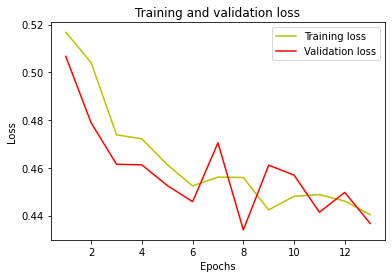

In [115]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Values stored in history are ... 
 {'loss': [0.5167853832244873, 0.5040373206138611, 0.47382473945617676, 0.4721147119998932, 0.4613299071788788, 0.4524064064025879, 0.4560927450656891, 0.4559217095375061, 0.4423651099205017, 0.4480610489845276, 0.4487728774547577, 0.4460541605949402, 0.4403613805770874], 'accuracy': [0.7860000133514404, 0.7860000133514404, 0.7860000133514404, 0.784333348274231, 0.7923333048820496, 0.7926666736602783, 0.7950000166893005, 0.7960000038146973, 0.7993333339691162, 0.8046666383743286, 0.8016666769981384, 0.7950000166893005, 0.8063333630561829], 'val_loss': [0.506671667098999, 0.47880327701568604, 0.4614867568016052, 0.46121177077293396, 0.45258304476737976, 0.44581207633018494, 0.47048962116241455, 0.43397021293640137, 0.46109136939048767, 0.45692628622055054, 0.4413822889328003, 0.44968029856681824, 0.43666818737983704], 'val_accuracy': [0.7900000214576721, 0.7900000214576721, 0.7900000214576721, 0.7919999957084656, 0.7919999957084656, 0.7919999957084656, 

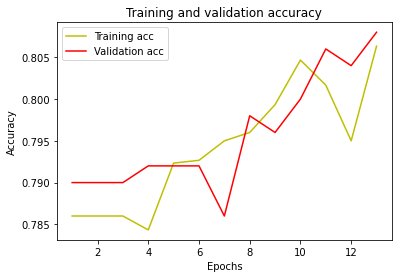

In [116]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history are ... \n", history.history)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluation part of the model**

In [117]:
#Evaluating the model
train_loss, train_acc = model.evaluate(training_set, steps=32)
validation_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 8s 242ms/step - loss: 0.4367 - accuracy: 0.8080
Train: 0.798, Test: 0.808


In [118]:
train_loss, train_acc = model.evaluate(training_set, steps=32)
test_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

32/32 [==============================] - 8s 243ms/step - loss: 0.4367 - accuracy: 0.8080
Train: 0.805, Test: 0.808


In [119]:
# Evaluate the model
scores = model.evaluate_generator(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-119-d33ba6da31cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


Loss of the model: 0.44
Test Accuracy: 80.80%


In [120]:
scores = model.evaluate_generator(training_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Training Accuracy: %.2f%%"%(scores[1] * 100))

<ipython-input-120-ddfd143517da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(training_set)


Loss of the model: 0.44
Training Accuracy: 79.83%


**Confusion Matrix**

In [247]:
test_pred = model.predict_generator(test_set)
y_pred = np.argmax(test_pred, axis=1)

<ipython-input-247-c14bf3b956d5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


<Figure size 432x288 with 0 Axes>

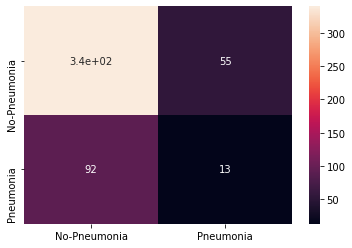

<Figure size 432x288 with 0 Axes>

In [248]:
#Visualizing confusion matrix
cm = confusion_matrix(test_set.labels,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')

**TP=TRUE POSITIVE, 
FP=FALSE POSITIVE, 
TN=TRUE NEGATIVE, 
FN=FALSE NEGATIVE**

In [249]:
TN, FP, FN, TP = cm.ravel()
print(TN, FP, FN, TP)

340 55 92 13


**Confusion matrix, Precision-Recall, TP/FP rates, f1-score**

In [250]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
test_pred = model.predict_generator(test_set)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(test_set.labels, np.round(y_pred))*100
cm = confusion_matrix(test_set.labels, np.round(y_pred))
classify_report = classification_report(test_set.labels, np.round(y_pred))


TN, FP, FN, TP = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
#precision = TP/(TP+FP)*100
#recall = TP/(TP+FN)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

# print classification report
print('Classification report on test data')
print(classify_report)

<ipython-input-250-44768ab77d36>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


CONFUSION MATRIX ------------------
[[340  55]
 [ 92  13]]

TEST METRICS ----------------------
Accuracy: 70.6%
Precision: 0.19117647058823528%
Recall: 0.12380952380952381%
F1-score: 0.15028901734104047

TRAIN METRIC ----------------------
Train acc: 80.63%
Classification report on test data
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       395
           1       0.19      0.12      0.15       105

    accuracy                           0.71       500
   macro avg       0.49      0.49      0.49       500
weighted avg       0.66      0.71      0.68       500



**TPR=TRUE POSITIVE RATE, 
FPR=FALSE POSITIVE RATE, 
TNR=TRUE NEGATIVE RATE, 
FNR=FALSE NEGATIVE RATE**

In [251]:
TPR = TP / (TP + FN)
TNR = TN / (TP + TN)
FPR = FP / (TP + FN)
FNR = FN / (FP + TN)

print('TRUE POSITIVE RATE is: {}'.format(TPR))
print('TRUE NEGATIVE RATE is: {}'.format(TNR))
print('FALSE POSITIVE RATE is: {}'.format(FPR))
print('FALSE NEGATIVE RATE is: {}'.format(FNR))

TRUE POSITIVE RATE is: 0.12380952380952381
TRUE NEGATIVE RATE is: 0.9631728045325779
FALSE POSITIVE RATE is: 0.5238095238095238
FALSE NEGATIVE RATE is: 0.23291139240506328


###CNN MODEL

**CNN model with more layers**

**Trying with adding more layers to the model**

In [159]:
CNN_model = Sequential()
#Adding 1st layer
CNN_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
CNN_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
#Adding 2nd layer
CNN_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
CNN_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
#Adding 3rd layer
CNN_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dropout(0.25))
CNN_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
CNN_model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
CNN_model.add(Dense(10, activation='softmax'))


In [160]:
CNN_model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_200 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 conv2d_201 (Conv2D)         (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 dropout_67 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_202 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 conv2d_203 (Conv2D)         (None, 112, 112, 64)      36928     
                                                     

**Visualization of the newly added layered model**

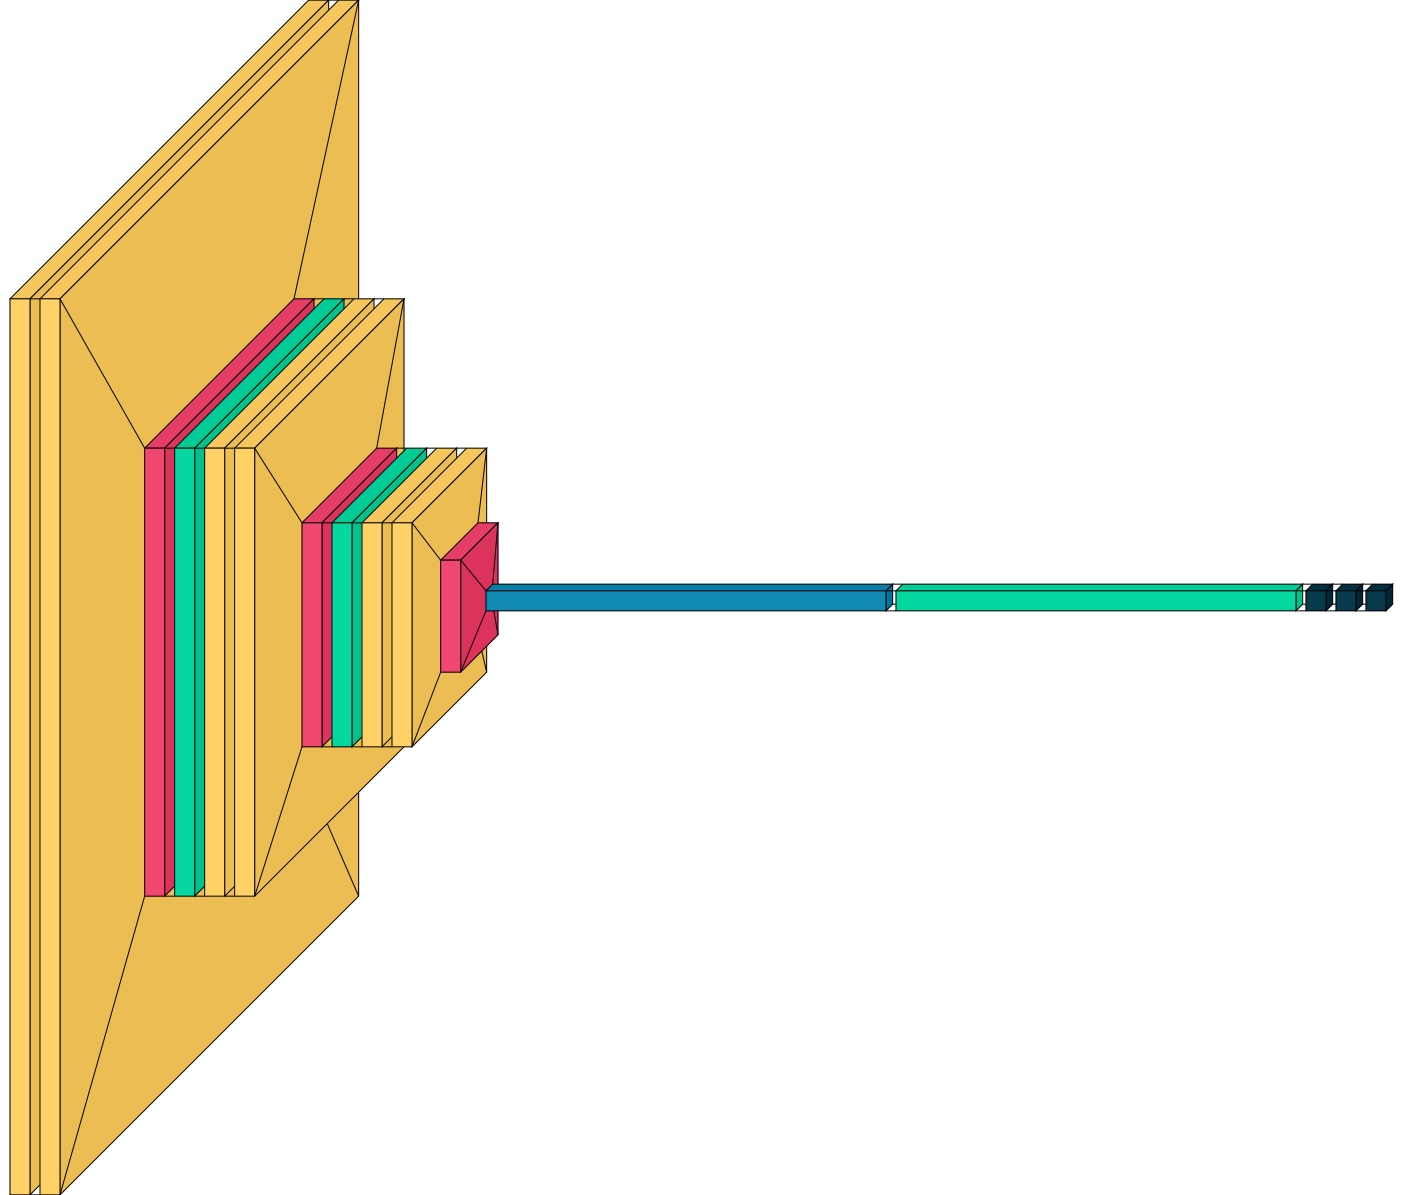

In [161]:
visualkeras.layered_view(CNN_model).show() # display using your system viewer
##visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(CNN_model, to_file='output.png').show() # write and show

visualkeras.layered_view(CNN_model)

**Data Augmentation and preparing the model**

In [162]:
# tell the model what cost and optimization method to use
CNN_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [163]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,                # Applaying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

In [164]:
training_set = train_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3000 images belonging to 2 classes.


In [165]:
test_set = test_datagen.flow_from_directory(r"C:\Users\Computing\Downloads\data-task1\data-task1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 500 images belonging to 2 classes.


**Callback functions for the model**

In [166]:
#ModelCheckpoint callback saves a model at some interval. 
filepath1=r"C:\Users\Computing\Downloads\data-task1\data-task1\CNN_model.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint1 = ModelCheckpoint(filepath1, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [167]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop1 = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, mode='min', verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for eight consecutive epochs.


In [168]:
#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv1 = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list1 = [checkpoint1, early_stop1, log_csv1]


**Fitting the model**

In [170]:
#Training the neural network
#We can now use these generators to train our model. 
#Give this a name so we can call it later for plotting loss, accuracy etc. as a function of epochs.
# fit the model
history1 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
 callbacks= callbacks_list1)

model.save('CNN_model1.hdf5')  # always save your weights after training or during training


<ipython-input-170-b7b80054deee>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


Epoch 1/25
94/94 [==============================] - 170s 2s/step - loss: 0.4360 - accuracy: 0.8013 - val_loss: 0.4412 - val_accuracy: 0.7980
Epoch 2/25
94/94 [==============================] - 170s 2s/step - loss: 0.4344 - accuracy: 0.8047 - val_loss: 0.4342 - val_accuracy: 0.8080
Epoch 3/25
94/94 [==============================] - 168s 2s/step - loss: 0.4373 - accuracy: 0.8043 - val_loss: 0.4309 - val_accuracy: 0.8060
Epoch 4/25
94/94 [==============================] - 167s 2s/step - loss: 0.4315 - accuracy: 0.8063 - val_loss: 0.4294 - val_accuracy: 0.8140
Epoch 5/25
94/94 [==============================] - 168s 2s/step - loss: 0.4371 - accuracy: 0.8030 - val_loss: 0.4327 - val_accuracy: 0.8060
Epoch 6/25
94/94 [==============================] - 170s 2s/step - loss: 0.4313 - accuracy: 0.8070 - val_loss: 0.4344 - val_accuracy: 0.8040
Epoch 7/25
94/94 [==============================] - 168s 2s/step - loss: 0.4319 - accuracy: 0.8023 - val_loss: 0.4379 - val_accuracy: 0.8160
Epoch 8/25
94

**Plotting the loss and accuracy curve**

Values stored in history1 are ... 
 {'loss': [0.4360264837741852, 0.4344431459903717, 0.4372701942920685, 0.4315249025821686, 0.4371015727519989, 0.43125268816947937, 0.43187031149864197, 0.4318785071372986, 0.4311715066432953, 0.43079227209091187, 0.4245256781578064, 0.4276071786880493, 0.4305173456668854, 0.43603214621543884, 0.43508243560791016, 0.4322887063026428, 0.42822974920272827, 0.42993512749671936, 0.4279361665248871, 0.4293501675128937], 'accuracy': [0.8013333082199097, 0.8046666383743286, 0.8043333292007446, 0.8063333630561829, 0.8029999732971191, 0.8069999814033508, 0.8023333549499512, 0.8050000071525574, 0.8086666464805603, 0.8063333630561829, 0.8083333373069763, 0.8090000152587891, 0.8029999732971191, 0.8033333420753479, 0.7996666431427002, 0.800000011920929, 0.8103333115577698, 0.8140000104904175, 0.8059999942779541, 0.8069999814033508], 'val_loss': [0.44119030237197876, 0.4341830611228943, 0.4309174716472626, 0.4293711185455322, 0.4327082931995392, 0.43435636162757874

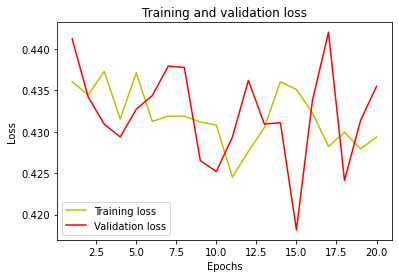

In [171]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history1 are ... \n", history1.history)
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Values stored in history1 are ... 
 {'loss': [0.4360264837741852, 0.4344431459903717, 0.4372701942920685, 0.4315249025821686, 0.4371015727519989, 0.43125268816947937, 0.43187031149864197, 0.4318785071372986, 0.4311715066432953, 0.43079227209091187, 0.4245256781578064, 0.4276071786880493, 0.4305173456668854, 0.43603214621543884, 0.43508243560791016, 0.4322887063026428, 0.42822974920272827, 0.42993512749671936, 0.4279361665248871, 0.4293501675128937], 'accuracy': [0.8013333082199097, 0.8046666383743286, 0.8043333292007446, 0.8063333630561829, 0.8029999732971191, 0.8069999814033508, 0.8023333549499512, 0.8050000071525574, 0.8086666464805603, 0.8063333630561829, 0.8083333373069763, 0.8090000152587891, 0.8029999732971191, 0.8033333420753479, 0.7996666431427002, 0.800000011920929, 0.8103333115577698, 0.8140000104904175, 0.8059999942779541, 0.8069999814033508], 'val_loss': [0.44119030237197876, 0.4341830611228943, 0.4309174716472626, 0.4293711185455322, 0.4327082931995392, 0.43435636162757874

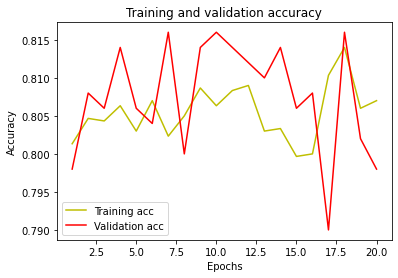

In [172]:
#plot the training and validation accuracy and loss at each epoch
print("Values stored in history1 are ... \n", history1.history)
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Evaluation part**

In [174]:
#Evaluating the model
train_loss, train_acc = model.evaluate(training_set, steps=32)
validation_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


32/32 [==============================] - 9s 251ms/step - loss: 0.4355 - accuracy: 0.7980
Train: 0.784, Test: 0.798


In [175]:
train_loss, train_acc = model.evaluate(training_set, steps=32)
test_loss, test_acc = model.evaluate(test_set, steps=32)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


32/32 [==============================] - 9s 252ms/step - loss: 0.4355 - accuracy: 0.7980
Train: 0.806, Test: 0.798


In [176]:
# Evaluate the model
scores = model.evaluate_generator(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))



<ipython-input-176-29ac9d290e95>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_set)


Loss of the model: 0.44
Test Accuracy: 79.80%


In [177]:
scores = model.evaluate_generator(training_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Training Accuracy: %.2f%%"%(scores[1] * 100))


<ipython-input-177-ddfd143517da>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(training_set)


Loss of the model: 0.42
Training Accuracy: 81.00%


**Confusion matrix**

In [252]:
test_pred = model.predict_generator(test_set)
y_pred = np.argmax(test_pred, axis=1)

<ipython-input-252-c14bf3b956d5>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


<Figure size 432x288 with 0 Axes>

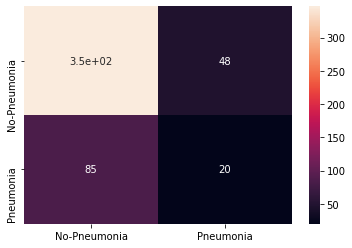

<Figure size 432x288 with 0 Axes>

In [253]:
#Visualizing confusion matrix
cm = confusion_matrix(test_set.labels,y_pred)

sns.heatmap(cm,annot=True,xticklabels=['No-Pneumonia', 'Pneumonia'],
            yticklabels=['No-Pneumonia', 'Pneumonia'])
plt.figure()
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')


**TP=TRUE POSITIVE, FP=FALSE POSITIVE, TN=TRUE NEGATIVE, FN=FALSE NEGATIVE**

In [254]:

TN, FP, FN, TP = cm.ravel()
print(TN, FP, FN, TP)



347 48 85 20


**Confusion matrix, TP/FP rates, Precision-Recall, f1-score**

In [255]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
test_pred = model.predict_generator(test_set)
#preds = model.predict(test_set)

#acc = accuracy_score([y_pred, np.round(test_pred)]*100).transpose()
acc = accuracy_score(test_set.labels, np.round(y_pred))*100
cm = confusion_matrix(test_set.labels, np.round(y_pred))
classify_report = classification_report(test_set.labels, np.round(y_pred))


TN, FP, FN, TP = cm.ravel() 
print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)
#precision = TP/(TP+FP)*100
#recall = TP/(TP+FN)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))

# print classification report
print('Classification report on test data')
print(classify_report)


<ipython-input-255-44768ab77d36>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_pred = model.predict_generator(test_set)


CONFUSION MATRIX ------------------
[[347  48]
 [ 85  20]]

TEST METRICS ----------------------
Accuracy: 73.4%
Precision: 0.29411764705882354%
Recall: 0.19047619047619047%
F1-score: 0.23121387283236997

TRAIN METRIC ----------------------
Train acc: 80.63%
Classification report on test data
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       395
           1       0.29      0.19      0.23       105

    accuracy                           0.73       500
   macro avg       0.55      0.53      0.54       500
weighted avg       0.70      0.73      0.71       500



**TPR=TRUE POSITIVE RATE, FPR=FALSE POSITIVE RATE, TNR=TRUE NEGATIVE RATE, FNR=FALSE NEGATIVE RATE**

In [256]:
TPR = TP / (TP + FN)
TNR = TN / (TP + TN)
FPR = FP / (TP + FN)
FNR = FN / (FP + TN)

print('TRUE POSITIVE RATE is: {}'.format(TPR))
print('TRUE NEGATIVE RATE is: {}'.format(TNR))
print('FALSE POSITIVE RATE is: {}'.format(FPR))
print('FALSE NEGATIVE RATE is: {}'.format(FNR))

TRUE POSITIVE RATE is: 0.19047619047619047
TRUE NEGATIVE RATE is: 0.9455040871934605
FALSE POSITIVE RATE is: 0.45714285714285713
FALSE NEGATIVE RATE is: 0.21518987341772153


**Prediction of the model**

In [257]:
from PIL import Image, ImageEnhance
from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

Person is Affected By PNEUMONIA


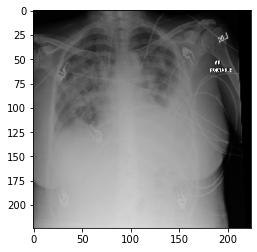

In [258]:
model=load_model('CNN_model1.hdf5')
img=image.load_img(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\pneumonia\00a05408-8291-4231-886e-13763e103161.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Person is not affected by PNEUMONIA")
plt.figure()
plt.imshow(img)

Person is not affected by PNEUMONIA


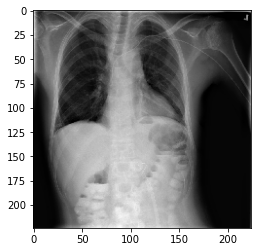

In [259]:
model=load_model('CNN_model1.hdf5')
img=image.load_img(r"C:\Users\Computing\Downloads\data-task1\data-task1\train\no_pneumonia\0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0.png",target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Person is not affected by PNEUMONIA")
    plt.figure()
plt.imshow(img)